# Titanic Data Analysis

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("titanic_data.csv")

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Question

* Did children have a better survival chance than adults?
* Did the passenger class affect the children survival chance?

## Data Wrangling

### 1. Pick relevant columns.
### 2. Some Age data are NaNs so we will drop the records withoud age values.



In [3]:
titanic_data = titanic_data [['PassengerId', 'Survived', 'Pclass', 'Age']].dropna()
titanic_data.describe()

,PassengerId,Survived,Pclass,Age
count,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118
std,259.119524,0.491460,0.838250,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,222.250000,0.000000,1.000000,20.125000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.750000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


* 177 records with null age values were removed 
* There are 714 records remaining enough for investigating our hypothesis

## Data Exploration

### We will explore the age distribution on the titanic

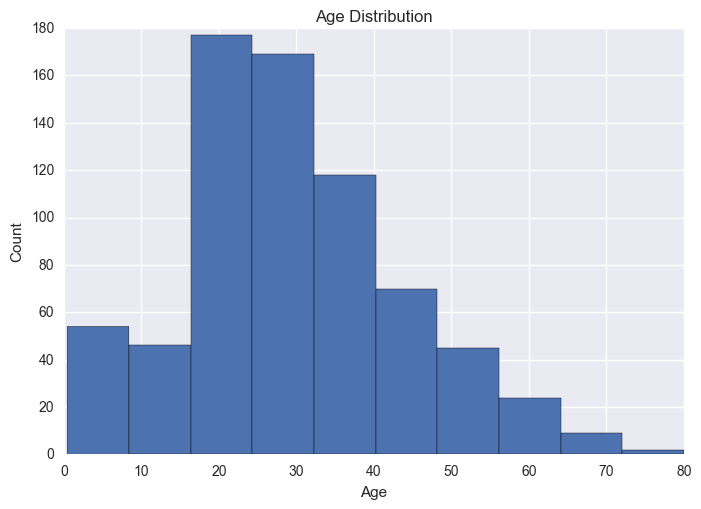

In [4]:
# Explore the age distribution on the Titanic
plt.title('Age Distribution')
plt.hist(titanic_data['Age'], )
plt.xlabel('Age')
plt.ylabel('Count')

 The histogram is skewed. The highest percentage of passengers aged 20-40 years.

### Explore the age distribution for the surviving passengers and those who did not survive to check if the average age of the two groups is different

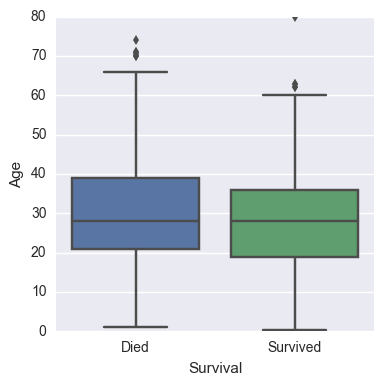

In [5]:
# Create Survival Label Column
titanic_data['Survival'] = titanic_data.Survived.map({0 : 'Died', 1 : 'Survived'})
# Show age distribution for the survivors and non-survivors group
sns.factorplot(x="Survival", y="Age",data=titanic_data, kind="box")


The average age is almost the same for both group but the surviving group has lower age range

### Did children have better survival rates than adults? First we separate the data into adults and children (<18 years old)

In [6]:
# Separate the data into children and adults
titanic_adult = titanic_data[titanic_data['Age']>= 18]
titanic_child = titanic_data[titanic_data['Age']<18]
titanic_data['AgeCat']=np.where(titanic_data['Age']<18, 'child','adult')

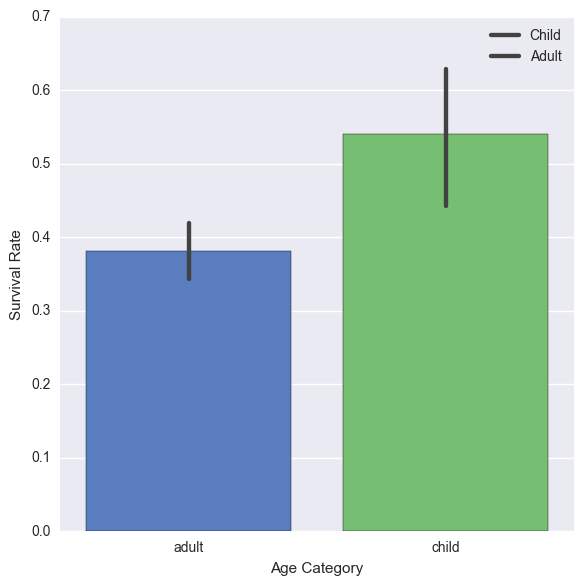

In [7]:
# Show children percentage in the survivors and the not so lucky ones
sns.factorplot('AgeCat', 'Survived',data = titanic_data, size=6, kind="bar", palette="muted")
#sbs([titanic_child['Survived'], titanic_adult['Survived']], stacked=True)
plt.legend(('Child', 'Adult'), loc='best')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.show()

 The children percentage in the survivng group is bigger than the other group, so let's do some numerical analysis

In [8]:
titanic_child.describe()


,PassengerId,Survived,Pclass,Age
count,113.000000,113.000000,113.000000,113.000000
mean,429.212389,0.539823,2.584071,9.041327
std,281.743819,0.500632,0.677781,6.030408
min,8.000000,0.000000,1.000000,0.420000
25%,172.000000,0.000000,2.000000,3.000000
50%,420.000000,1.000000,3.000000,9.000000
75%,721.000000,1.000000,3.000000,16.000000
max,876.000000,1.000000,3.000000,17.000000


In [9]:
titanic_adult.describe()

,PassengerId,Survived,Pclass,Age
count,601.000000,601.000000,601.000000,601.000000
mean,452.224626,0.381032,2.171381,33.583195
std,254.728694,0.486045,0.849851,12.185705
min,1.000000,0.000000,1.000000,18.000000
25%,233.000000,0.000000,1.000000,24.000000
50%,451.000000,0.000000,2.000000,31.000000
75%,672.000000,1.000000,3.000000,40.000000
max,891.000000,1.000000,3.000000,80.000000


* 54% of children survived
* 38.1% of adults survived

In [10]:
print "Average age of survivors:", titanic_data[titanic_data['Survived']==1]['Age'].mean()
print "Average age of non-survivors:", titanic_data[titanic_data['Survived']==0]['Age'].mean()


Average age of survivors: 28.3436896552
Average age of non-survivors: 30.6261792453


### What about children from different classes? Do they have the same survival chance?

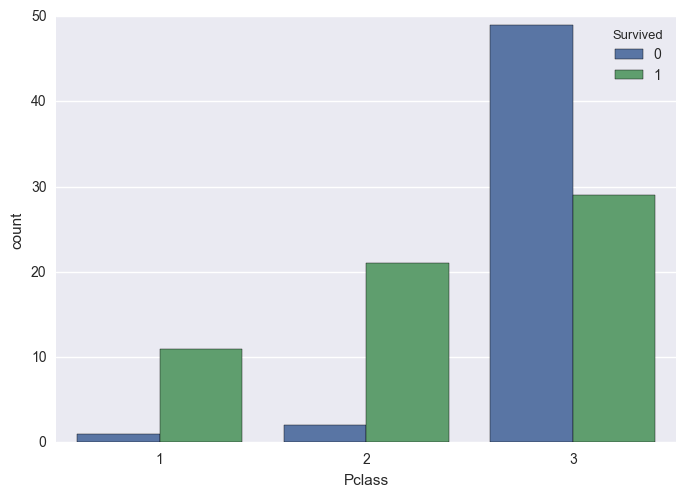

In [11]:
sns.countplot(data=titanic_child, x="Pclass", hue="Survived")

### The survival rate in class 1 is much higher than class 2 and 3

## Conclusion

* Although there is some evidence that children have higher survival chance, age does not seem to be a major factor.
* We removed many records due to missing age data which could have affected the results.
* The passenger class is a better feature to predict survival on the titanic. Passengers from class 1 have the highest survival rate
* Being a child from class 1 seems to give an excellent survival chance

## References

* https://www.kaggle.com/c/titanic/data